# Participer à un concours sur la Smart City

## SOMMAIRE

### PARTIE 1. La présentation générale du jeu de données

### PARTIE 2. Le nettoyage du jeu de données

### PARTIE 3. L'analyse exploratoire de données

### PARTIE 4. L'idée d'application 

## PARTIE 1.  La présentation générale du jeu de données

### 1.1. L'installation et importation des librairies du jeu données

L'installation et importation les librairies Pandas pour lire et manipuler le jeu de données,Numpy pour effectuer des opérations de base sur les tableaux, pour visualiser les résultats, Matplotlib et seaborne inline pour afficher les graphiques directement sous la cellule de code qui les produisent, seaborn pour dessiner différents types de graphiques, et missingno pour visualiser les matrices.


In [1]:
!pip install pandas
!pip install seaborn
!pip install numpy
!pip install matplotlib
!pip install missingno
!pip install relational



import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
import matplotlib as mpl
import missingno as msno
sns.set()

In [2]:
data = pd.read_csv("p2-arbres-fr.csv", sep=";")

### 1.3. La description du Jeu de données

Informations sur les données notamment la répartition de valeurs nulles et les noms et types respectifs pour chaque variable.

In [3]:
data.shape

(200137, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

 Le jeu de données est de type DataFrame . Il est composé de 200 137 lignes que represente les arbres , et 18 colomnes  quie represente les variables.

Les variables sont de trois types:

 4 variables sont de type numérique continues notées "float64()" 
 3 variables sont de type numériques discrètes notées "int64()"
 11 variables sont de types catégorielles notées "object"

il y a des variables avec des valeurs manquantes dont "variete" avec 81% de valeurs manqante, "stade_developpement" avec 34% de valeurs manqantes et "libelle_francais" avec 0.7% de "valeurs manqantes. La variable "numero"est vide.

#### 1.3.1 La visualisation des premières et dernières lignes

L'examen des données peut se faire en affichant les premières et les,dernières lignes de notre jeu de données.

##### 1.3.1.1. Les premières lignes 

In [5]:
data.head()

id type_emplacement domanialite   arrondissement complement_addresse  \
0  99874            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
1  99875            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
2  99876            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
3  99877            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
4  99878            Arbre      Jardin  PARIS 17E ARRDT                 NaN   

   numero                                        lieu id_emplacement  \
0     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             19   
1     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             20   
2     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             21   
3     NaN   MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             22   
4     NaN  PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0037   

  libelle_francais      genre         espece variete  circonference_cm  \
0       Marronnier   Aesculus  hippocastanum     NaN                20   
1               If      Taxus        baccata     NaN                65   
2               If      Taxus        baccata     NaN                90   
3           Erable       Acer        negundo     NaN                60   
4     Arbre à miel  Tetradium      daniellii     NaN                38   

   hauteur_m stade_developpement  remarquable  geo_point_2d_a  geo_point_2d_b  
0          5                 NaN          0.0       48.857620        2.320962  
1          8                   A          NaN       48.857656        2.321031  
2         10                   A          NaN       48.857705        2.321061  
3          8                   A          NaN       48.857722        2.321006  
4          0                 NaN          NaN       48.890435        2.315289

##### 1.3.1.2. Les dernières lignes 

In [6]:
data.tail()

id type_emplacement domanialite     arrondissement  \
200132  2024741            Arbre      Jardin  BOIS DE VINCENNES   
200133  2024742            Arbre      Jardin  BOIS DE VINCENNES   
200134  2024743            Arbre      Jardin  BOIS DE VINCENNES   
200135  2024744            Arbre      Jardin  BOIS DE VINCENNES   
200136  2024745            Arbre      Jardin  BOIS DE VINCENNES   

       complement_addresse  numero  \
200132                 NaN     NaN   
200133                 NaN     NaN   
200134                 NaN     NaN   
200135                 NaN     NaN   
200136                 NaN     NaN   

                                                     lieu id_emplacement  \
200132  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170151   
200133  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170152   
200134  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170153   
200135  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170154   
200136  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170155   

           libelle_francais     genre       espece variete  circonference_cm  \
200132                  NaN  Castanea     fargesii     NaN                 0   
200133  Arbre aux mouchoirs   Davidia  involucrata     NaN                 0   
200134             Peuplier   Populus      simonii     NaN                 0   
200135                Chêne   Quercus       n. sp.     NaN                 0   
200136            Raisinier   Hovenia       dulcis     NaN                 0   

        hauteur_m stade_developpement  remarquable  geo_point_2d_a  \
200132          0                 NaN          0.0       48.821957   
200133          0                 NaN          0.0       48.823254   
200134          0                 NaN          0.0       48.822907   
200135          0                 NaN          0.0       48.822522   
200136          0                 NaN          0.0       48.820445   

        geo_point_2d_b  
200132        2.456264  
200133        2.457935  
200134        2.457970  
200135        2.455956  
200136        2.454856

### 1.4. La statistiques descriptives

Pour commencer à évaluer la qualité des données, nous regardons les statistiques descriptives Celles-ci nous permettent de détecter dès maintenant s'il y a des variables/valeurs à corriger, à supprimer ou à traiter, et s'il existe des anomalies qu'il faudra également traiter.


L'évaluation de la qualité des donnnées commence par regarder les statiques descriptives. Cela  guidera le traitement des données.

In [7]:
data.describe()

id  numero  circonference_cm      hauteur_m    remarquable  \
count  2.001370e+05     0.0     200137.000000  200137.000000  137039.000000   
mean   3.872027e+05     NaN         83.380479      13.110509       0.001343   
std    5.456032e+05     NaN        673.190213    1971.217387       0.036618   
min    9.987400e+04     NaN          0.000000       0.000000       0.000000   
25%    1.559270e+05     NaN         30.000000       5.000000       0.000000   
50%    2.210780e+05     NaN         70.000000       8.000000       0.000000   
75%    2.741020e+05     NaN        115.000000      12.000000       0.000000   
max    2.024745e+06     NaN     250255.000000  881818.000000       1.000000   

       geo_point_2d_a  geo_point_2d_b  
count   200137.000000   200137.000000  
mean        48.854491        2.348208  
std          0.030234        0.051220  
min         48.742290        2.210241  
25%         48.835021        2.307530  
50%         48.854162        2.351095  
75%         48.876447        2.386838  
max         48.911485        2.469759

 La statistiques descriptives montre que les écart-types et les valeurs maximales des variables "circonference_cm" et "hauteur_m" paraissent anormalement élevés. La variable "numero" est pratiquement vide, et la variable "remarquable" a beaucoup de valeurs nulles.

## PARTIE 2. Le nettoyage du jeu des données

### 2.1. La suppression de variable inutile

Etant vide et donc inutile pour l'analyse, la variable "numero" sera supprimé.

In [8]:
data.drop(['id', 'numero'], axis = 1, inplace = True)

 #### 2.1.1. La vérification de la suppréssion 

In [9]:
data.columns

Index(['type_emplacement', 'domanialite', 'arrondissement',
       'complement_addresse', 'lieu', 'id_emplacement', 'libelle_francais',
       'genre', 'espece', 'variete', 'circonference_cm', 'hauteur_m',
       'stade_developpement', 'remarquable', 'geo_point_2d_a',
       'geo_point_2d_b'],
      dtype='object')

Le résultat montre que les variables "numero" et "id" n'apparaîssent plus dans le jeu de données.

### 2.2 Les valeurs manquantes

Nous explorons à présent si le jeu de données contient des valeurs manquantes. Nous commençons par la visualisation des valeurs manquantes sur l'ensemble du jeu de données.

Nous procédons ensuite à la gestion des valeurs manquantes en:

   les remplaçant par le mode pour trois variables catégorielles ("domanialite", "stade_developpement", et "remarquable"),les remplaçant par le terme "Non defini" pour quatre  variables catégorielles ("libelle_francais", "espece", "variete", et "complement_addresse"),et en supprimant les individus (lignes) ayant des valeurs manquantes pour une variable catégorielles ("genre").
   
   
 La recherches des valeurs manquante se fera en visualisant l'ensemble du jeu donnéés.

#### 2.2.1. La visualisation des valeurs manquantes

La création de la matrice pour la visualisations des valeurs manquantes sur l'ensemble du jeu de données.

##### 2.2.1.1. la création des matrices

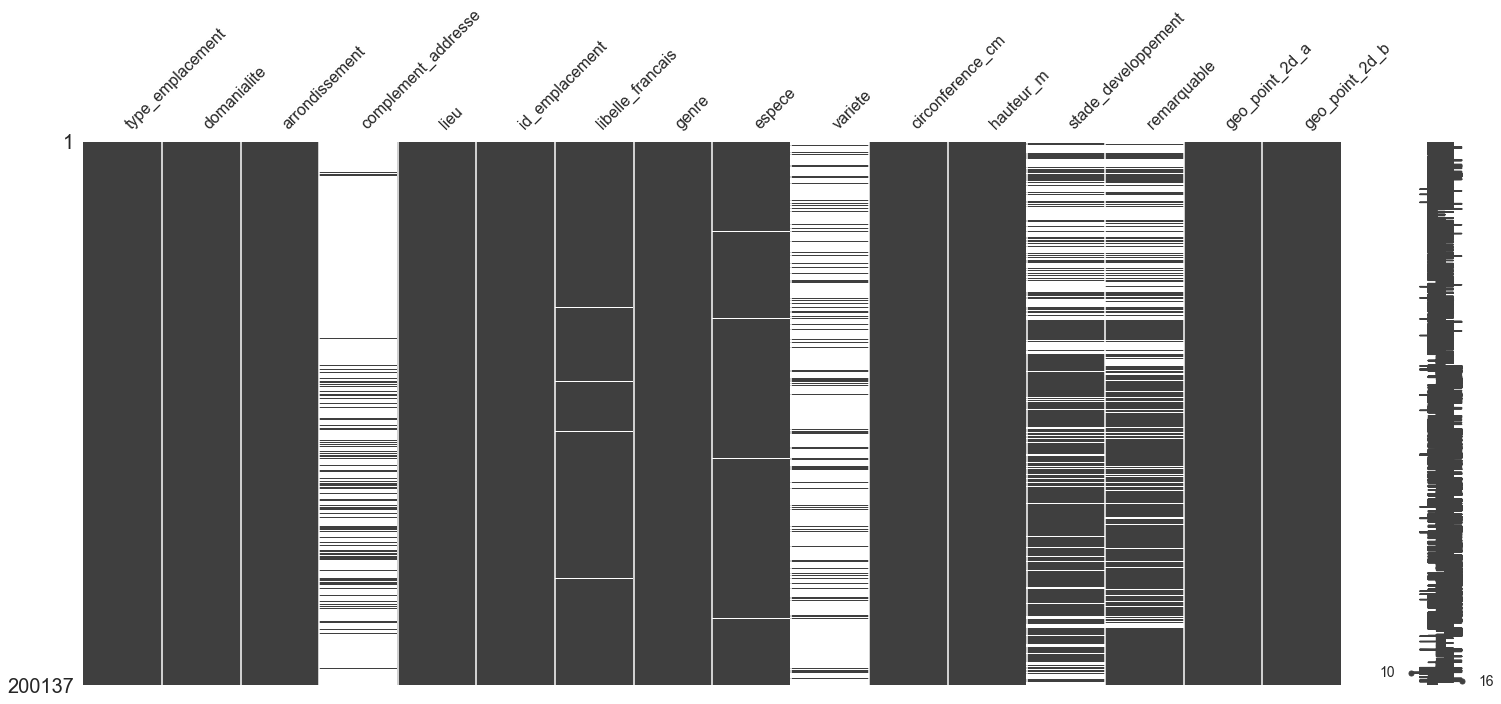

In [10]:
fig = msno.matrix(pd.DataFrame(data))
fig_copy = fig.get_figure()

La matrice montre qu'il y a beaucoups  de valeurs manquantes pour les variables "complement_adresse" et "variete",suivi par les variables "stade_developpement" et "remarquable", et enfin les variables "libelle_francais" et "espece" avec peu de de valeurs manquantes.

##### 2.2.1.2. Le nombre de valeurs manquantes par variable

In [11]:
data.isnull().sum().sort_values(ascending=False)      

complement_addresse    169235
variete                163360
stade_developpement     67205
remarquable             63098
espece                   1752
libelle_francais         1497
genre                      16
domanialite                 1
type_emplacement            0
arrondissement              0
lieu                        0
id_emplacement              0
circonference_cm            0
hauteur_m                   0
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

Il y a donc 8 variables ayant des valeurs manquanttes. Ces valeurs manquantes n'ont peut etre pas été colectés par exemple.

#### 2.2.2  Le remplacement des valeurs manquantes 

Le remplacement des valeurs manquantes se fera  par le terme "Non Defini" pour trois variables catégorielles:"domanialite","stade_developpement",et "remarquable","libelle_francais","espece","variete",et "complement_addresse".
Le remplacement des valeurs manquantes de type objet, ce fera par le "Mode".

##### 2.2.2.1. Le calcul du Mode

In [12]:
mode_domanialite = data.domanialite.mode()[0]
mode_stade_developpement = data.stade_developpement.mode()[0]
mode_remarquable = data.remarquable.mode()[0]

##### 2.2.2.2. Le remplacement des valeurs manquantes par la Valeur du Mode

In [13]:
data.domanialite.fillna(mode_domanialite, inplace=True)
data.stade_developpement.fillna(mode_stade_developpement, inplace=True)
data.remarquable.fillna(mode_remarquable, inplace=True)

##### 2.2.2.3  Le remplacement des valeurs manquantes par le terme Non defini

In [14]:
data.libelle_francais.fillna("Non defini", inplace=True)
data.espece.fillna("Non defini", inplace=True)
data.variete.fillna("Non defini", inplace=True)
data.complement_addresse.fillna("Non defini", inplace=True)

#### 2.2.3. Suppression des arbres

Il y a 16 arbres qu' ont  des valeur manquante à la variable "genre","espece","variete", "circonference_cm", "hauteur_m", "stade_developpement" et "remarquable".C'est variables,étant important pour l'analyse donc ils seron donc  supprimé du jeu de données.

In [15]:
genre_missing_values = data[data['genre'].isnull()].index
data = data.drop(genre_missing_values, axis=0)


#### 2.2.4. Vérification de la suppression 

La vérification que toutes les valeurs manquantes du jeu de données ont été traité en affichant le nombre de valeurs manquantes par variable.

In [16]:
data.isnull().sum().sort_values(ascending=False)

type_emplacement       0
domanialite            0
arrondissement         0
complement_addresse    0
lieu                   0
id_emplacement         0
libelle_francais       0
genre                  0
espece                 0
variete                0
circonference_cm       0
hauteur_m              0
stade_developpement    0
remarquable            0
geo_point_2d_a         0
geo_point_2d_b         0
dtype: int64

### 2.3. La vérification de présence de doubons

In [17]:
nb_duplicate_rows = data[data.duplicated()]
format(nb_duplicate_rows.shape[0])

'0'

Il y a donc aucun doublons

### 2.4.  Les valeurs aberrantes

Le traitement  des valeurs aberrantes des variables "hauteur_m",
et "circonference_cm".

In [18]:
data.hauteur_m.describe().transpose()

count    200121.000000
mean         13.111558
std        1971.296183
min           0.000000
25%           5.000000
50%           8.000000
75%          12.000000
max      881818.000000
Name: hauteur_m, dtype: float64

Il y a 200.121 arbres dans ce jeu de donnéesavec une hauteur moyenne  de 13 m.Le plus petit à  une hauteur de 0 metre et le plus grand  a une hauteur de 881818 m.L'écart-type qui représente la dispersion des données par rapport à la moyenne, est de 1.971 m . La hauteur maximale qui est de 881 818 m.

In [19]:
data.circonference_cm.describe().transpose()

count    200121.000000
mean         83.387146
std         673.216711
min           0.000000
25%          30.000000
50%          70.000000
75%         115.000000
max      250255.000000
Name: circonference_cm, dtype: float64

Il y a 199.769 arbres dans ce jeu de donnéesavec une circonférence moyenne  de 83.41 cm .Le plus mince à une circonférence de 250255 cm et le plus gros  a une circonférence de 8673.60.L'écart-type qui représente la dispersion des données par rapport à la moyenne, est de 673.60 cm.

##### 2.4.1. L'affichage des valeurs aberrantes des variable "hauteur_m" et "circonference_cm" 

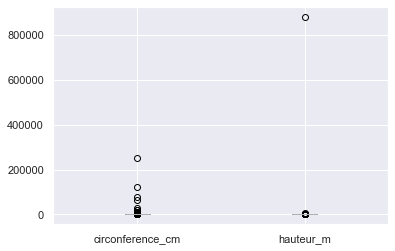

In [20]:
data.boxplot(column=['circonference_cm','hauteur_m' ])
plt.show()

La boite à moustache montre l'exixtance de valeurs abérrantes

##### 2.4.2. La suppression des valeurs aberrantes

A la suite d' une recherche sur internet des valeurs record d'hauteur et de circonference, on supprimera les valeurs au-dessus de 66.4 m pour la hauteuret 1100 cm pour la circonference.
Une élustration à travers une boite à moustache.

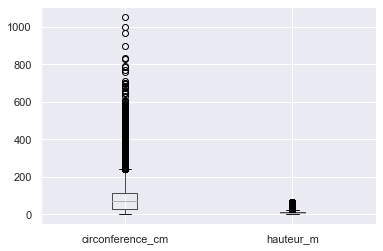

In [21]:
data_filtered = data[(data["circonference_cm"] < 1100) & (data["hauteur_m"] < 66.40)]
data_filtered.boxplot(column=['circonference_cm','hauteur_m' ])
plt.show()

### 2.5. Les valeurs limitées aux quantiles.

In [22]:
q_low_c = data_filtered["circonference_cm"].quantile(0.25)
q_hi_c  = data_filtered["circonference_cm"].quantile(0.75)

q_low_h = data_filtered["hauteur_m"].quantile(0.25)
q_hi_h  = data_filtered["hauteur_m"].quantile(0.75)

data_good = data_filtered[(data_filtered["circonference_cm"] < q_hi_c) &
                          (data_filtered["circonference_cm"] > q_low_c)&
                          (data_filtered["hauteur_m"] < q_hi_h) &
                          (data_filtered["hauteur_m"] > q_low_h)]

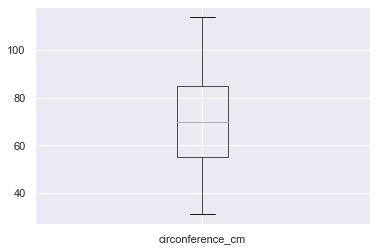

In [23]:
data_good.boxplot(column=['circonference_cm' ])
plt.show()

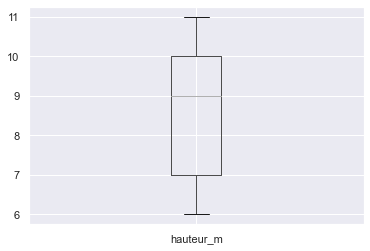

In [24]:
data_good.boxplot(column=['hauteur_m' ])
plt.show()

### 2.6.  La  nouvelle statistiques descriptives

In [25]:
data_good.describe()

circonference_cm     hauteur_m   remarquable  geo_point_2d_a  \
count      56009.000000  56009.000000  56009.000000    56009.000000   
mean          70.303487      8.616597      0.000054       48.856153   
std           20.362260      1.551748      0.007319        0.024057   
min           31.000000      6.000000      0.000000       48.742488   
25%           55.000000      7.000000      0.000000       48.836908   
50%           70.000000      9.000000      0.000000       48.854541   
75%           85.000000     10.000000      0.000000       48.872981   
max          114.000000     11.000000      1.000000       48.911485   

       geo_point_2d_b  
count    56009.000000  
mean         2.341387  
std          0.048981  
min          2.210416  
25%          2.301937  
50%          2.342893  
75%          2.377771  
max          2.469754

On note qu'on a des valeur plus réaliste avec ces données.

## PARTIE 3. L' analyse exploratoire des données

Maintenant que nous avons "nettoyé" le jeu de données, nous pouvons procéder à l'"analyse exploratoire des données" dans cette troisième partie.

Nous commençons par une analyse univariée en inspectant chaque variable individuellement. Ensuite, nous continuons avec une analyse bivariée et multivariée, en inspectant les relations entre deux ou plusieurs variables.

### 3.1. L'analyse univariée

#### 3.1.1. Les variables du jeu de données

In [26]:
print(data_good.dtypes)

type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object


##### 3.1.2. La variable "type_emplacement"

La quantité d'arbres pour chaque catégorie de la variable "type_emplacement".

In [27]:
data_good.type_emplacement.value_counts(normalize=True)

Arbre    1.0
Name: type_emplacement, dtype: float64

La variable "type_emplacement" possède une seule catégorie nommée "arbre".

#### 3.1.3 La variable "arrondissement"

##### 3.1.3.1 La visualisation des 15 arrondissements les plus arborés

In [28]:
arrondissement = data_good.arrondissement\
                   .value_counts()\
                   .sort_values(ascending=False)

most_trees_ar = arrondissement[:15]

most_trees_ar

PARIS 15E ARRDT      5560
PARIS 16E ARRDT      5221
PARIS 13E ARRDT      5197
PARIS 12E ARRDT      4326
PARIS 14E ARRDT      4216
PARIS 20E ARRDT      3875
PARIS 18E ARRDT      3218
PARIS 17E ARRDT      3091
PARIS 7E ARRDT       2923
PARIS 19E ARRDT      2644
BOIS DE VINCENNES    2426
PARIS 8E ARRDT       2368
PARIS 11E ARRDT      2031
SEINE-SAINT-DENIS    1495
BOIS DE BOULOGNE     1469
Name: arrondissement, dtype: int64

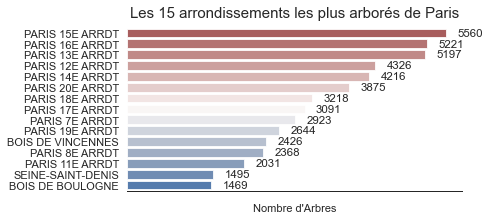

In [29]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)

ax = sns.barplot(x=most_trees_ar,
                 y=most_trees_ar.index,
                 data=data_good, palette="vlag_r")


ax.set_title('Les 15 arrondissements les plus arborés de Paris',
             fontsize='15', pad=10)
ax.set_xlabel("Nombre d\'Arbres", size=11)
ax.set_ylabel("")

for p in ax.patches:
    
    height=p.get_height()
    
    width=p.get_width()
    
    ax.text(x=width+200,
            
            y=p.get_y()+(height/2),
            
            s='{:.0f}'.format(width),
            
            va='center')

sns.despine(left=True)

ax.set(xticklabels=[])

_, ylabels = plt.yticks()
ax.set_yticklabels(ylabels, size=11)

plt.show()

La majeure partie des arbres se situent dans PARIS 16E ARRDT, PARIS 13E ARRDT et PARIS 12E ARRDT.

##### 3.1.3.2 La visualisation des 10 arrondissements les moins arborées

In [30]:
less_trees_ar = arrondissement[-10:]

less_trees_ar

PARIS 10E ARRDT    1341
PARIS 4E ARRDT      985
PARIS 5E ARRDT      685
PARIS 6E ARRDT      553
PARIS 3E ARRDT      524
VAL-DE-MARNE        503
PARIS 9E ARRDT      406
PARIS 1ER ARRDT     402
HAUTS-DE-SEINE      340
PARIS 2E ARRDT      210
Name: arrondissement, dtype: int64

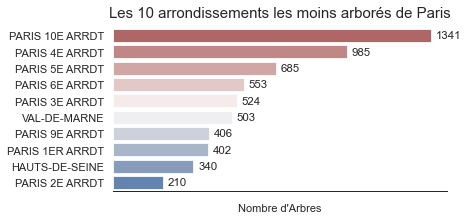

In [31]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)

ax = sns.barplot(x=less_trees_ar,
                 y=less_trees_ar.index,
                 data=data_good,
                 palette="vlag_r")

ax.set_title('Les 10 arrondissements les moins arborés de Paris',
             fontsize='15', pad=10)
ax.set_xlabel("Nombre d\'Arbres", size=11)
ax.set_ylabel("")

for p in ax.patches:
    height=p.get_height()
    width=p.get_width()
    
    ax.text(x=width+20,
            y=p.get_y()+(height/2),
            s='{:.0f}'.format(width),
            va='center')

sns.despine(left=True)

ax.set(xticklabels=[])

_, ylabels = plt.yticks()
ax.set_yticklabels(ylabels, size=11)

plt.show()

Les arrondissements les moins arborés sont PARIS 2E ARRDT, HAUT-DE-SEINE et PARIS 1ER ARRDT.

#### 3.1.4.  La variable "lieu"

##### 3.1.4.1. Le taux de presence  d'arbres par "lieu"

In [32]:
data_good.lieu.value_counts(normalize=True).sort_values(ascending=False)

PARC DE BERCY                                        0.011641
AVENUE DES CHAMPS ELYSEES                            0.010534
ROUTE DE LA PYRAMIDE                                 0.010088
JARDIN DU CHAMP DE MARS                              0.009891
ALLEE DE LONGCHAMP                                   0.009498
                                                       ...   
SQUARE DE L'ABBE GEORGES HENOCQUE                    0.000018
PLACE DE L ABBE JEAN LEBEUF                          0.000018
CRECHE FAMILIALE / 49 BOULEVARD MASSENA              0.000018
ECOLE MATERNELLE / 20 RUE PATAY                      0.000018
CIMETIERE DE LA CHAPELLE / AVENUE DU MIDI / DIV 4    0.000018
Name: lieu, Length: 3690, dtype: float64

Il y a 3690 lieux.

##### 3.1.4.2 La visualisation des 15 lieux les plus arborés.

In [33]:
lieu = data_good.lieu.value_counts().sort_values(ascending=False)

most_trees_l = lieu[:15]

most_trees_l

PARC DE BERCY                                      652
AVENUE DES CHAMPS ELYSEES                          590
ROUTE DE LA PYRAMIDE                               565
JARDIN DU CHAMP DE MARS                            554
ALLEE DE LONGCHAMP                                 532
AVENUE DAUMESNIL                                   475
RUE ORDENER                                        393
PARC GEORGES BRASSENS / 2 PLACE JACQUES MARETTE    391
BOULEVARD RASPAIL                                  385
ALLEE DE LA REINE MARGUERITE                       371
BOULEVARD ARAGO                                    365
PARC DES BUTTES CHAUMONT                           345
PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE        339
RUE DE LA CONVENTION                               338
BOULEVARD AUGUSTE BLANQUI                          332
Name: lieu, dtype: int64

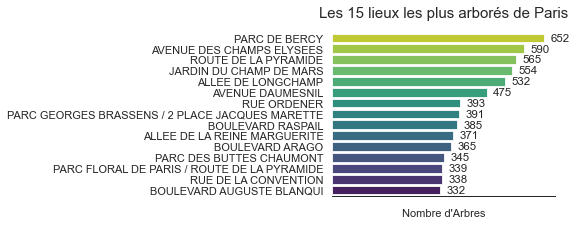

In [34]:
sns.set(rc={'figure.figsize':(4, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)


ax = sns.barplot(x=most_trees_l,
                 y=most_trees_l.index,
                 data=data_good,palette="viridis_r")

ax.set_title('Les 15 lieux les plus arborés de Paris',
             fontsize='15', pad=15)
ax.set_xlabel("Nombre d\'Arbres", size=11)
ax.set_ylabel("")

for p in ax.patches:
    
    height=p.get_height()
    
    width=p.get_width()
   
    ax.text(x=width+20,
            
            y=p.get_y()+(height/2),
            
            s='{:.0f}'.format(width),
            
            va='center')

sns.despine(left=True)

ax.set(xticklabels=[])

_, ylabels = plt.yticks()
ax.set_yticklabels(ylabels, size=11)

plt.show()

Les lieux les plus arborés sont Le PARC DE BERCY, AVENUE DES CHAMPS ELYSEEES et  ROUTE DE LA PYRAMIDE.

##### 3.1.4.3 La visualisation des 15 "lieux" les moins arborés

In [35]:
lieu = data_good.lieu.value_counts()\
         .sort_values(ascending=False)

less_trees_l = lieu[-15:]

less_trees_l

ECOLE MATERNELLE / 94 RUE COURONNES                        1
CIMETIERE DE SAINT-OUEN NOUV / AVENUE DE L'EST / DIV 23    1
CIMETIERE D'IVRY / DIV 13                                  1
CIMETIERE D'IVRY / AVENUE LATERALE N4 / DIV 32             1
SQUARE VILLA OTTOZ                                         1
CIMETIERE DE THIAIS / AVENUE L / DIV 9                     1
CIMETIERE D'IVRY / AVENUE TRANSVERSALE N2 / DIV 43         1
CIMETIERE DE LA CHAPELLE / AVENUE DU MIDI / DIV 6          1
RUE JACQUES CALLOT                                         1
RAMPONEAU (51) ELEM                                        1
SQUARE DE L'ABBE GEORGES HENOCQUE                          1
PLACE DE L ABBE JEAN LEBEUF                                1
CRECHE FAMILIALE / 49 BOULEVARD MASSENA                    1
ECOLE MATERNELLE / 20 RUE PATAY                            1
CIMETIERE DE LA CHAPELLE / AVENUE DU MIDI / DIV 4          1
Name: lieu, dtype: int64

La plus gande partie des lieux les moins arboréz se sont des cimetiéres

#### 3.1.5 La variable "libelle_francais"

##### 3.1.5.1. Le taux d'arbres par "libelle_francais"

In [36]:
data_good.libelle_francais.value_counts(normalize=True).sort_values(ascending=False)

Platane             0.186809
Tilleul             0.145012
Marronnier          0.130318
Erable              0.083379
Sophora             0.070489
                      ...   
Arbre à perruque    0.000018
Nyssa               0.000018
Abricotier          0.000018
Orme de Samarie     0.000018
Fusain              0.000018
Name: libelle_francais, Length: 132, dtype: float64

Il y a 132 types de "libelle_francais".

##### 3.1.5.2. La visualisation des 15 types de "libelle_francais" les plus nombreux

In [37]:
libelle_francais = data_good.libelle_francais\
                .value_counts().sort_values(ascending=False)
most_trees_lf = libelle_francais[:15]

most_trees_lf

Platane                 10463
Tilleul                  8122
Marronnier               7299
Erable                   4670
Sophora                  3948
Noisetier de Byzance     1887
Frêne                    1614
Micocoulier              1535
Poirier à fleurs         1232
Charme                   1170
Pin                       849
Chêne                     774
Bouleau                   663
Orme                      588
Cerisier à fleurs         568
Name: libelle_francais, dtype: int64

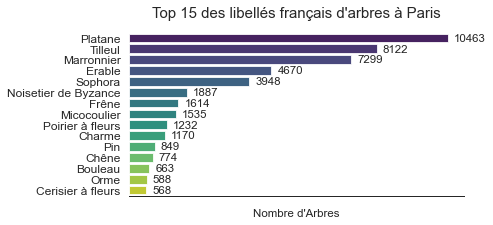

In [38]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)

ax = sns.barplot(x=most_trees_lf,y=most_trees_lf.index, data=data_good,palette="viridis")

ax.set_title('Top 15 des libellés français d\'arbres à Paris',fontsize='15', pad=15)
ax.set_xlabel("Nombre d\'Arbres")
ax.set_ylabel("")

for p in ax.patches:
    
    height=p.get_height()
    
    width=p.get_width()
   
    ax.text(x=width+200, y=p.get_y()+(height/2),s='{:.0f}'.format(width),va='center')

sns.despine(left=True)

ax.set(xticklabels=[])

_, ylabels = plt.yticks()
ax.set_yticklabels(ylabels, size=12)


plt.show()

Le Platane, le Tilleul, le Marronnier etl'Erable sont les types de libellés français d'arbres les plus nombreux à Paris.

##### 3.1.5.3. La visualisation des 15 types de "libelle_francais" les moins nombreux

In [39]:
less_trees_lf = libelle_francais[-15:]

less_trees_lf

Araucaria              1
Nothofagus             1
Poliothyrsis           1
Cytise                 1
Cormier                1
Chitalpa               1
Lilas                  1
Argousier              1
Laurier du Portugal    1
Abelia                 1
Arbre à perruque       1
Nyssa                  1
Abricotier             1
Orme de Samarie        1
Fusain                 1
Name: libelle_francais, dtype: int64

Le Laurier du Portugal,le Sumac ,le Cormier sont les types de libellés français d'arbres les plus nombreux à Paris.

#### 3.1.6. La variable "genre"

##### 3.1.6.1. Le taux d'arbres par "genre"

In [40]:
data_good.genre.value_counts(normalize=True).sort_values(ascending=False)

Platanus        0.187166
Tilia           0.146155
Aesculus        0.131747
Acer            0.084058
Sophora         0.070614
                  ...   
Euonymus        0.000018
Nyssa           0.000018
Abelia          0.000018
Rhus            0.000018
Brachychiton    0.000018
Name: genre, Length: 113, dtype: float64

Il y a 113 genres.

3.1.6.2.La visualisation des 15 plus nombreux genres d'arbres 

In [41]:
genre = data_good.genre.value_counts().sort_values(ascending=False)

most_trees_g = genre[:15]

most_trees_g

Platanus    10483
Tilia        8186
Aesculus     7379
Acer         4708
Sophora      3955
Corylus      1898
Fraxinus     1876
Celtis       1568
Prunus       1444
Pyrus        1295
Carpinus     1188
Pinus         851
Quercus       779
Betula        667
Ulmus         601
Name: genre, dtype: int64

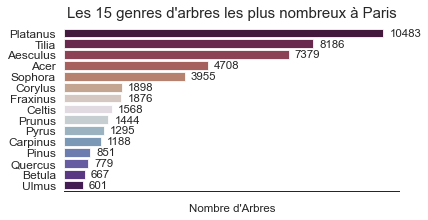

In [42]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)

ax = sns.barplot(x=most_trees_g,y=most_trees_g.index,data=data_good,palette="twilight_shifted_r")

ax.set_title('Les 15 genres d\'arbres les plus nombreux à Paris',
             fontsize='15', pad=10)
ax.set_xlabel("Nombre d\'Arbres")
ax.set_ylabel("")

for p in ax.patches:
   
    height=p.get_height()
   
    width=p.get_width()
   
    ax.text(x=width+200,
            
            y=p.get_y()+(height/2),
            
            s='{:.0f}'.format(width),
            
            va='center')

sns.despine(left=True)

ax.set(xticklabels=[])

_, ylabels = plt.yticks()
ax.set_yticklabels(ylabels, size=12)

plt.show()

Le Platanus,le Tilia, l' Aesculus et l' Acer et le Sophora sont les genres d'arbre les plus nombreux de Paris.

##### 3.1.6.3. La visualisation des 15 genres d'arbres moins nombreux

In [43]:
less_trees_g = genre[-10:]

less_trees_g

x Chitalpa        1
Ptelea            1
Nothofagus        1
Laburnocytisus    1
Araucaria         1
Euonymus          1
Nyssa             1
Abelia            1
Rhus              1
Brachychiton      1
Name: genre, dtype: int64

Le Laburnocytisus, le Carya, le Euonymus sont les genres d'arbres les plus nombreux de Paris.

#### 3.1.7.  La variable "espece"

##### 3.1.7.1. Le taux d'arbres pour chaque"espece".

In [44]:
data_good.espece.value_counts(normalize=True).sort_values(ascending=False)

x hispanica       0.164402
hippocastanum     0.098074
japonica          0.070596
tomentosa         0.056955
n. sp.            0.042386
                    ...   
sieboldii         0.000018
circinatum        0.000018
x berolinensis    0.000018
simulans          0.000018
obliqua           0.000018
Name: espece, Length: 261, dtype: float64

Il y a 261 especes.

##### 3.1.7.2 La visualisation des 15 especes d'arbres les plus nombreuses

In [45]:
espece = data_good.espece.value_counts().sort_values(ascending=False)

most_trees_e = espece[:15]

most_trees_e

x hispanica       9208
hippocastanum     5493
japonica          3954
tomentosa         3190
n. sp.            2374
platanoides       2109
x europaea        2085
colurna           1892
x carnea          1672
australis         1527
cordata           1518
pseudoplatanus    1359
calleryana        1247
excelsior         1247
betulus           1182
Name: espece, dtype: int64

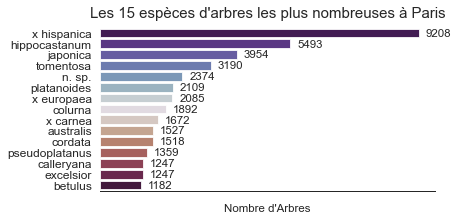

In [46]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)

ax = sns.barplot(x=most_trees_e, y=most_trees_e.index, data=data_good,palette="twilight_shifted")

ax.set_title('Les 15 espèces d\'arbres les plus nombreuses à Paris',
             fontsize='15', pad=10)
ax.set_xlabel("Nombre d\'Arbres")
ax.set_ylabel("")

for p in ax.patches:
   
    height=p.get_height()
    width=p.get_width()
    ax.text(x=width+200,
            
            y=p.get_y()+(height/2),
            s='{:.0f}'.format(width),
            va='center')

sns.despine(left=True)

ax.set(xticklabels=[])

_, ylabels = plt.yticks()
ax.set_yticklabels(ylabels, size=12)

plt.show()

L'x hispanica, l' hippocastanium et le japonica sont les espèces d'arbres les plus nombreuses.

##### 3.1.7.3 La visualisation des 15 especes d'arbres les moins nombreuses

In [47]:
less_trees_e = espece[-15:]

less_trees_e

acerifolius       1
europaeus         1
araucana          1
maximowicziana    1
vulgaris          1
vulgare           1
freemanii         1
armeniaca         1
transitoria       1
canariensis       1
sieboldii         1
circinatum        1
x berolinensis    1
simulans          1
obliqua           1
Name: espece, dtype: int64

La formosana, le tashkentensis, Le circinatum sont les especes d'arbres les moins nombreux.

#### 3.1.8 La variable "variete"

##### 3.1.8.1. Le taux d'arbres par "variete"

In [48]:
data_good.variete.value_counts(normalize=True).sort_values(ascending=False)

Non defini        0.794658
Baumannii'        0.035048
Chanticleer'      0.020711
Briotii'          0.020300
Euchlora'         0.018176
                    ...   
Reine Claude'     0.000018
Esveld Select'    0.000018
Marginata'        0.000018
Fastigiatum'      0.000018
Albertii'         0.000018
Name: variete, Length: 172, dtype: float64

Il y a 172 variétés d'arbre

##### 3.1.8.2 La visualisation des 15 plus nombreuses variétés d'arbre

In [49]:
espece = data_good.variete.value_counts().sort_values(ascending=False)

most_trees_e = espece[:15]

most_trees_e

Non defini                      44508
Baumannii'                       1963
Chanticleer'                     1160
Briotii'                         1137
Euchlora'                        1018
Fastigiata'                       843
Pallida'                          776
Diversifolia'                     617
Pissardii'                        307
Sapporo Autumn Gold' RESISTA      290
Greenspire'                       268
Kanzan'                           235
Columnare'                        140
Westhof's Glorie'                 123
Italica'                          117
Name: variete, dtype: int64

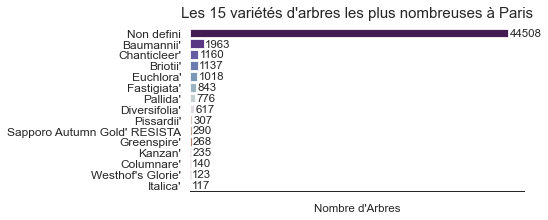

In [50]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)

ax = sns.barplot(x=most_trees_e, y=most_trees_e.index, data=data_good,palette="twilight_shifted")

ax.set_title('Les 15 variétés d\'arbres les plus nombreuses à Paris',
             fontsize='15', pad=10)
ax.set_xlabel("Nombre d\'Arbres")
ax.set_ylabel("")

for p in ax.patches:
   
    height=p.get_height()
    width=p.get_width()
    ax.text(x=width+200,
            
            y=p.get_y()+(height/2),
            s='{:.0f}'.format(width),
            va='center')

sns.despine(left=True)

ax.set(xticklabels=[])

_, ylabels = plt.yticks()
ax.set_yticklabels(ylabels, size=12)

plt.show()

La variété des arbres sont majoritairement non definie, suivi des Beaumannii, Chanticleer et Brotii.

##### 3.1.8.3 La visualisation des 10 moins nombreuses variétés d'arbres

In [51]:
variete = data_good.variete.value_counts().sort_values(ascending=False)

less_trees_v = variete[-10:]
less_trees_v

Splendens'        1
Pembury Blue'     1
Henk Vink'        1
Sericea'          1
Golden Hornet'    1
Reine Claude'     1
Esveld Select'    1
Marginata'        1
Fastigiatum'      1
Albertii'         1
Name: variete, dtype: int64

Rubra, Smaragd et Ambrozyana sont les especes d'arbres les moins nombreux

#### 3.1.9. La variable "stade_developpement"

##### 3.1.9.1 Le taux d'arbre par "stade_developpement"

In [52]:
data_good.stade_developpement\
        .value_counts(normalize=True)\
        .sort_values(ascending=False)

A     0.451945
JA    0.395419
J     0.151404
M     0.001232
Name: stade_developpement, dtype: float64

Il y a 4 stades de developpement adulte, jeune adulte jeune et mature.

##### 3.1.9.2. La visualisation du nombre d'arbres par "stade_developpement".

In [53]:
stade_developpement = data_good.stade_developpement\
                        .value_counts().sort_values(ascending=False)

stade_developpement

A     25313
JA    22147
J      8480
M        69
Name: stade_developpement, dtype: int64

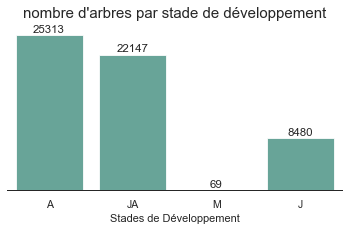

In [54]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)

ax = sns.countplot(x='stade_developpement',data=data_good,color='#5EAE9E')


ax.set_title('nombre d\'arbres par stade de développement',
             fontsize='15', pad=10)
ax.set_xlabel("Stades de Développement",
             fontsize=11)
ax.set_ylabel("")


for p in ax.patches:
    
    height=p.get_height()
    
    ax.text(x=p.get_x() + (p.get_width() / 2),
            
            y=height + 500,
         
            s='{:.0f}'.format(height),
          
            ha='center')
    
sns.despine(left=True)

ax.set(yticklabels=[])

plt.show()

Les arbres de stade de développement adulte sont plus nombreux suivi par les arbres de stade de développement jeune adulte.

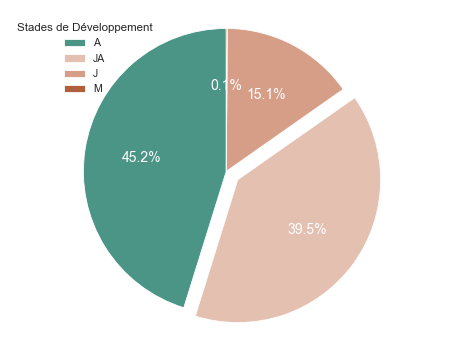

In [55]:
pie_labels = stade_developpement.index

pie_sizes = data_good.stade_developpement.value_counts(normalize=True)

pie_explode = [0, 0.1, 0, 0]
pie_colors = ["#4A9586", "#E4C0B1", "#D69E87", "#B05F3C"]

fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(pie_sizes,
        explode=pie_explode,
        labels=pie_labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=pie_colors,
        textprops=dict(color="w",
                       fontsize=14))
ax1.axis('equal')

plt.legend()
legend = plt.legend(title="Stades de Développement",
                    loc="upper left")
plt.show()

Le stade de développement adulte est ici nettement dominant.

#### 3.1.10. La variable "remarquable"

##### 3.1.10.1.  Le taux d'arbres remarquables 

In [56]:
data_good.remarquable.value_counts()

0.0    56006
1.0        3
Name: remarquable, dtype: int64

In [57]:
len(data_good.remarquable.unique())

2

les arbres sont remquable ou non remarquable .

##### 3.1.10.2. la visualisation du nombre d'arbres "remarquable".

In [58]:
remarquable = data_good.remarquable\
                .value_counts().sort_values(ascending=False)

remarquable

0.0    56006
1.0        3
Name: remarquable, dtype: int64

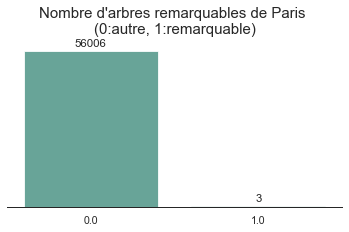

In [59]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)

ax = sns.countplot(x='remarquable', 
                   data=data_good,
                   color='#5EAE9E')

ax.set_title('Nombre d\'arbres remarquables de Paris \n(0:autre, 1:remarquable)',
             fontsize='15', pad=10)
ax.set_xlabel("")
ax.set_ylabel("")

for p in ax.patches:
  
    height=p.get_height()

    ax.text(x=p.get_x() + (p.get_width() / 2),
          
            y=height+2000,
            
            s='{:.0f}'.format(height),
            
            ha='center')
    
sns.despine(left=True)

ax.set(yticklabels=[])
plt.show()

Il y a 3 arbres remarquables.

### 3.2. La suppression de la variable inutile

la variable inutile est la variable "type_emplacement".

In [60]:
data.drop(['type_emplacement'], axis = 1, inplace = True)

#### 3.2.1. La vérification de la suppression

In [61]:
data.columns

Index(['domanialite', 'arrondissement', 'complement_addresse', 'lieu',
       'id_emplacement', 'libelle_francais', 'genre', 'espece', 'variete',
       'circonference_cm', 'hauteur_m', 'stade_developpement', 'remarquable',
       'geo_point_2d_a', 'geo_point_2d_b'],
      dtype='object')

la variable "type_emplacement" est bien supprimée.

### 3.3. La répartition des tailles en fonction du nombre arbre

In [62]:
values_sorted_h = data_good.hauteur_m.value_counts()\
                              .sort_values(ascending=False)

values_sorted_h.head(5)

10    23262
8     12153
6      8345
7      5959
9      4105
Name: hauteur_m, dtype: int64

la hauteur d'arbre la plus fréquente est de 10 m suivie de 8 m.

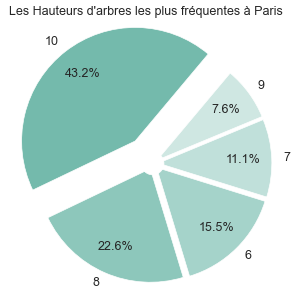

In [63]:
labels = values_sorted_h[:5].index
sizes = values_sorted_h[:5]


colors = ['#74BAAC', '#8DC7BB', '#A5D3CA', '#C0E0DA', '#CFE7E2', '#DCEDEA']
explode = (0.25, 0.05, 0.05, 0.05, 0.05)
fig1, ax1 = plt.subplots(figsize=[6, 6], dpi=60)


ax1.pie(sizes,
        colors=colors,
        labels=labels,
        autopct='%1.1f%%',
        pctdistance=0.75,
        explode=explode,
        startangle=50,
        textprops={'fontsize': 15})
ax1.axis('equal')

centre_circle = plt.Circle((0, 0),
                           0.10,
                           fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.title("Les Hauteurs d'arbres les plus fréquentes à Paris",
          fontsize=15)


plt.show()

La hauteur d'arbre la plus fréquente est de 10 m suivie de 8 m.

### 3.4. L'analyse exploratoire des arbres d'une hauteur de 10 m

#### 3.4.1 La visualisation du jeu de données pour les arbres de 10 m.

In [64]:
data_10 = data_good[(data_good['hauteur_m'] == 10)]
data_10.shape

(23262, 16)

 Le jeu de données est de type DataFrame. Il est composé de 23262 lignes que represente les arbres , et 16 colomnes  quie represente les variables.

##### 3.4.1.1. La visualisation du jeu de données  avec les varables hauteur_m, genre_ dominalité et lieu.

In [65]:
data_10.loc[:, ['hauteur_m', 'genre',
               'domanialite', 'lieu']]

hauteur_m     genre domanialite  \
2              10     Taxus      Jardin   
82             10    Betula      Jardin   
271            10     Tilia      Jardin   
272            10     Tilia      Jardin   
274            10     Tilia      Jardin   
...           ...       ...         ...   
198565         10  Platanus  Alignement   
198756         10  Aesculus      Jardin   
198759         10  Aesculus      Jardin   
198763         10  Aesculus      Jardin   
198777         10   Robinia      Jardin   

                                                     lieu  
2               MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E  
82              JARDIN DE LA CITE INTERNATIONALE DES ARTS  
271                                         PARC DE BERCY  
272                                         PARC DE BERCY  
274                                         PARC DE BERCY  
...                                                   ...  
198565                                         VOIE CV/19  
198756           SQUARE CLARA ZETKIN / 21 AVENUE BOUTROUX  
198759           SQUARE CLARA ZETKIN / 21 AVENUE BOUTROUX  
198763           SQUARE CLARA ZETKIN / 21 AVENUE BOUTROUX  
198777  SQUARE DE LA TOUR SAINT JACQUES / 1 BIS RUE SA...  

[23262 rows x 4 columns]

3.4.1.2. La répartition des domanialités pour les arbres de 10 m

In [66]:
dom_10 = data_10['hauteur_m']\
                    .groupby(data_10['domanialite'])\
                    .count().sort_values(ascending=False)[:10]

dom_10

domanialite
Alignement      17235
Jardin           2541
PERIPHERIQUE     1387
CIMETIERE        1143
DASCO             480
DJS               383
DFPE               93
Name: hauteur_m, dtype: int64

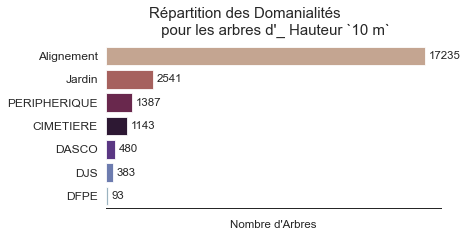

In [67]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)

ax = sns.barplot(x=dom_10,
                 y=dom_10.index,
                 data=data_good,
                 palette="twilight_r")

ax.set_title('Répartition des Domanialités\
              \n pour les arbres d\'_ Hauteur `10 m`',
             fontsize='15', pad=10)
ax.set_xlabel("Nombre d\'Arbres")
ax.set_ylabel("")


for p in ax.patches:
    
    height=p.get_height()
   
    width=p.get_width()
    
    ax.text(x=width + 200,
          
            y=p.get_y() + (height / 2),
            
            s='{:.0f}'.format(width),
           
            va='center')


sns.despine(left=True)

ax.set(xticklabels=[])

_, ylabels = plt.yticks()
ax.set_yticklabels(ylabels, size=12)

plt.show()

Les arbres de 10 m sont majoritaire present dans la dominalité alignement .

##### 3.4.1.3. Top 15 des arrondissements les plus arborés avec des arbres de 10 mètres

In [68]:
Ard_10 = data_10['hauteur_m']\
                    .groupby(data_10['arrondissement'])\
                .count().sort_values(ascending=False)[:15]

Ard_10

arrondissement
PARIS 12E ARRDT      3251
PARIS 16E ARRDT      2776
PARIS 15E ARRDT      2206
PARIS 19E ARRDT      2104
PARIS 13E ARRDT      1979
PARIS 20E ARRDT      1704
PARIS 11E ARRDT      1631
PARIS 14E ARRDT      1098
PARIS 18E ARRDT       945
PARIS 7E ARRDT        878
PARIS 17E ARRDT       853
PARIS 8E ARRDT        754
PARIS 4E ARRDT        589
BOIS DE VINCENNES     539
PARIS 1ER ARRDT       373
Name: hauteur_m, dtype: int64

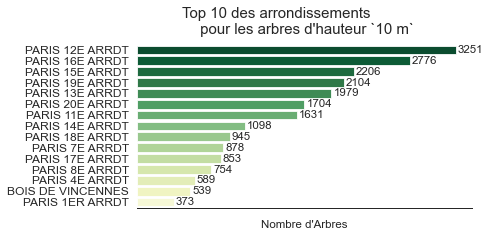

In [69]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)

ax = sns.barplot(x=Ard_10,
                 y=Ard_10.index,
                 data=data_good,
                 palette="YlGn_r")

ax.set_title('Top 10 des arrondissements\
              \n pour les arbres d\'hauteur `10 m`',
             fontsize='15', pad=10)
ax.set_xlabel("Nombre d\'Arbres")
ax.set_ylabel("")

for p in ax.patches:
   
    height = p.get_height()
    
    width = p.get_width()
  
    ax.text(x=width + 20,
            
            y=p.get_y() + (height / 2),
           
            s='{:.0f}'.format(width),
            
            va='center')

sns.despine(left=True)

ax.set(xticklabels=[])

_, ylabels = plt.yticks()
ax.set_yticklabels(ylabels, size=12)

plt.show()

L'arrondissement le plus arboré d'arbre de 10 m est PARIS 12 E. 

##### 3.4.1.4. Le top 10 des lieux les plus arborés avec des arbres de 10 mètres

In [70]:
lieu_10 = data_10['hauteur_m']\
                    .groupby(data_10['lieu'])\
                    .count().sort_values(ascending=False)[:15]


lieu_10

lieu
AVENUE DAUMESNIL                       355
AVENUE DE FLANDRE                      284
PARC DE BERCY                          278
AVENUE HENRI MARTIN                    245
RUE DE TOLBIAC                         240
AVENUE PARMENTIER                      224
RUE DE LA CONVENTION                   219
AVENUE GEORGES MANDEL                  219
AVENUE DE BRETEUIL                     193
AVENUE GAMBETTA                        193
AVENUE DES CHAMPS ELYSEES              186
QUAI DE LA RAPEE                       179
AVENUE DE LA REPUBLIQUE                161
VIADUC DES ARTS - PROMENADE PLANTEE    149
BOULEVARD DE L HOPITAL                 146
Name: hauteur_m, dtype: int64

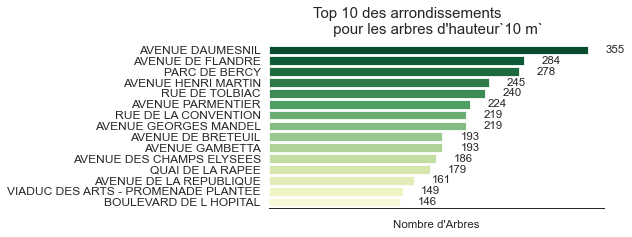

In [71]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)

ax = sns.barplot(x=lieu_10,
                 y=lieu_10.index,
                 data=data_good,
                 #color="#A5D3CA",
                 palette="YlGn_r")

ax.set_title('Top 10 des arrondissements\
              \n pour les arbres d\'hauteur`10 m`',
             fontsize='15', pad=10)
ax.set_xlabel("Nombre d\'Arbres")
ax.set_ylabel("")

for p in ax.patches:
   
    height = p.get_height()
    
    width = p.get_width()
   
    ax.text(x=width + 20,
            
            y=p.get_y() + (height / 2),
           
            s='{:.0f}'.format(width),
            
            va='center')

sns.despine(left=True)

ax.set(xticklabels=[])

_, ylabels = plt.yticks()
ax.set_yticklabels(ylabels, size=12)

plt.show()

Le lieu le plus arborés d'arbre de 10 m est l' AVENUE D'AUMESNIL

#####3.4.1.4. Le top 15 des genres d'arbres de 10 mètres

In [72]:
genr_10 = data_10['hauteur_m']\
                    .groupby(data_10['genre'])\
                    .count().sort_values(ascending=False)[:15]
genr_10

genre
Platanus    5465
Tilia       4078
Aesculus    3260
Sophora     2211
Acer        1727
Fraxinus     763
Corylus      712
Celtis       611
Carpinus     388
Pinus        356
Robinia      342
Quercus      236
Populus      233
Pyrus        223
Betula       217
Name: hauteur_m, dtype: int64

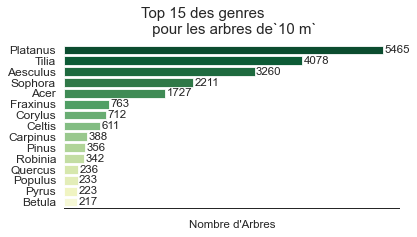

In [73]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)

ax = sns.barplot(x=genr_10,
                 y=genr_10.index,
                 data=data_good,
                 palette="YlGn_r")


ax.set_title('Top 15 des genres\
              \n pour les arbres de`10 m`',
             fontsize='15', pad=10)
ax.set_xlabel("Nombre d\'Arbres")
ax.set_ylabel("")

for p in ax.patches:
    
    height = p.get_height()
    
    width = p.get_width()
    
    ax.text(x=width + 20,
           
            y=p.get_y() + (height / 2),
            
            s='{:.0f}'.format(width),
            
            va='center')

sns.despine(left=True)

ax.set(xticklabels=[])

_, ylabels = plt.yticks()
ax.set_yticklabels(ylabels, size=12)

plt.show()

Le genre d'arbre de 10 m le plus nombreux est le Platanus

##### 3.4.1.5. Le top 15 des éspèces des arbres de 10 mètres

In [74]:
espe_10 = data_10['hauteur_m']\
                .groupby(data_10['espece'])\
                .count().sort_values(ascending=False)[:15]

espe_10

espece
x hispanica       4871
hippocastanum     2646
japonica          2201
tomentosa         1592
x europaea        1068
n. sp.             942
platanoides        853
cordata            817
colurna            711
australis          602
excelsior          567
pseudoplatanus     508
x carnea           495
nigra              469
occidentalis       419
Name: hauteur_m, dtype: int64

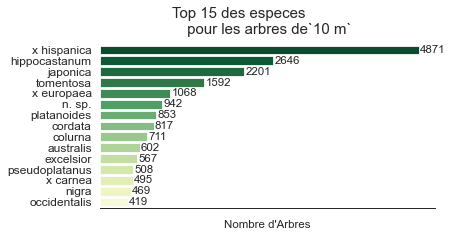

In [75]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)


ax = sns.barplot(x=espe_10,
                 y=espe_10.index,
                 data=data_good,
                 palette="YlGn_r")

ax.set_title('Top 15 des especes\
              \n pour les arbres de`10 m`',
             fontsize='15', pad=10)
ax.set_xlabel("Nombre d\'Arbres")
ax.set_ylabel("")


for p in ax.patches:
    
    height = p.get_height()
    
    width = p.get_width()
 
    ax.text(x=width + 20,
            
            y=p.get_y() + (height / 2),
            
            s='{:.0f}'.format(width),
        
            va='center')

sns.despine(left=True)

ax.set(xticklabels=[])

_, ylabels = plt.yticks()
ax.set_yticklabels(ylabels, size=12)

plt.show()

##### 3.4.1.6. Le top 15 des variétés d'arbres de 10 mètres

In [76]:
vart_10 = data_10['hauteur_m']\
                    .groupby(data_10['variete'])\
                    .count().sort_values(ascending=False)[:15]

vart_10

variete
Non defini                      19354
Baumannii'                        859
Euchlora'                         587
Pallida'                          394
Briotii'                          360
Diversifolia'                     224
Fastigiata'                       214
Chanticleer'                      209
Sapporo Autumn Gold' RESISTA       82
Greenspire'                        66
Italica'                           65
Schwedleri'                        61
Bessoniana'                        59
Unifolia'                          58
Nova'                              51
Name: hauteur_m, dtype: int64

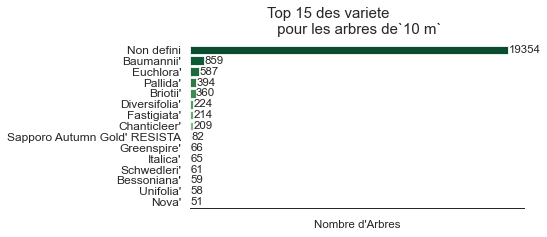

In [77]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)


ax = sns.barplot(x=vart_10,
                 y=vart_10.index,
                 data=data_good,
                 palette="YlGn_r")


ax.set_title('Top 15 des variete\
              \n pour les arbres de`10 m`',
             fontsize='15', pad=10)
ax.set_xlabel("Nombre d\'Arbres")
ax.set_ylabel("")

for p in ax.patches:
    height = p.get_height()
    
    width = p.get_width()
   
    ax.text(x=width + 20,
            
            y=p.get_y() + (height / 2),
         
            s='{:.0f}'.format(width),
            
            va='center')

sns.despine(left=True)

ax.set(xticklabels=[])

_, ylabels = plt.yticks()
ax.set_yticklabels(ylabels, size=12)

plt.show()

La variété d'arbre de 10 m la plus nombreuse est la non définie suivi long derriere par la variété BAumannii.

##### 3.4.1.7. Le top 15 les arbres libéllés français de 10 m

In [78]:
lf_10 = data_10['hauteur_m']\
                    .groupby(data_10['libelle_francais'])\
                    .count().sort_values(ascending=False)[:15]

lf_10

libelle_francais
Platane                 5462
Tilleul                 4055
Marronnier              3253
Sophora                 2210
Erable                  1718
Frêne                    728
Noisetier de Byzance     707
Micocoulier              605
Charme                   381
Pin                      354
Robinier                 340
Chêne                    236
Peuplier                 231
Poirier à fleurs         219
Bouleau                  215
Name: hauteur_m, dtype: int64

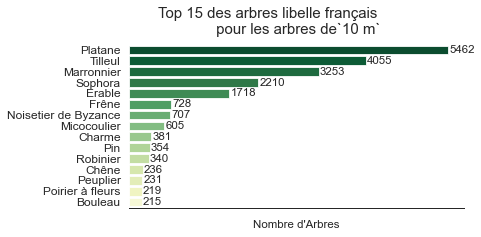

In [79]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)


ax = sns.barplot(x=lf_10,
                 y=lf_10.index,
                 data=data_good,
                 palette="YlGn_r")


ax.set_title('Top 15 des arbres libelle français\
              \n pour les arbres de`10 m`',
             fontsize='15', pad=10)
ax.set_xlabel("Nombre d\'Arbres")
ax.set_ylabel("")

for p in ax.patches:
    
    height = p.get_height()
    
    width = p.get_width()

    ax.text(x=width + 20,
            
            y=p.get_y() + (height / 2),
          
            s='{:.0f}'.format(width),
          
            va='center')

sns.despine(left=True)

ax.set(xticklabels=[])

_, ylabels = plt.yticks()
ax.set_yticklabels(ylabels, size=12)

plt.show()

L'arbre libbellé francais le plus nombreux est le Platane

##### 3.4.1.8. La répartition par stades de développement pour les arbres de 10 mètres

In [80]:
stad_10 = data_10['hauteur_m']\
                    .groupby(data_10['stade_developpement'])\
                    .count().sort_values(ascending=False)[:10]

stad_10

stade_developpement
A     11882
JA    10018
J      1334
M        28
Name: hauteur_m, dtype: int64

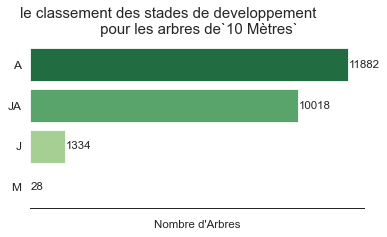

In [81]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)


ax = sns.barplot(x=stad_10,
                 y=stad_10.index,
                 data=data_good,
                 palette="YlGn_r")

ax.set_title('le classement des stades de developpement\
              \n pour les arbres de`10 Mètres`',
             fontsize='15', pad=10)
ax.set_xlabel("Nombre d\'Arbres")
ax.set_ylabel("")

for p in ax.patches:
    height = p.get_height()
    
    width = p.get_width()
  
    ax.text(x=width + 20,
            
            y=p.get_y() + (height / 2),
           
            s='{:.0f}'.format(width),
           
            va='center')

sns.despine(left=True)

ax.set(xticklabels=[])

_, ylabels = plt.yticks()
ax.set_yticklabels(ylabels, size=12)

plt.show()

Le stade de developpement le plus nombreux pour les arbre de 10 m est l'adulte.

### 3.5 La visualsation de la répartition de la hauteur en fonction de la dominalité avec des boite à boite à moustache

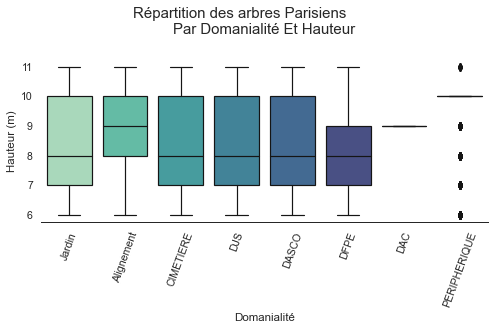

In [82]:

sns.set(rc={'figure.figsize':(8, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)


sns.boxplot(data=data_good,
            x='domanialite', 
            y='hauteur_m',
            palette='mako_r'
            )


plt.title('Répartition des arbres Parisiens\
            \nPar Domanialité Et Hauteur',
          size=15, pad=25)
plt.xlabel("Domanialité")
plt.ylabel("Hauteur (m)")


plt.xticks(rotation=70)

sns.despine(left=True)

plt.show()

Les arbres dans les jardins,dans les cimetières et dans les DJS suivent la même répartition  

### 3.6. La visualisation de la relation entre la domanialité,la hauteur et Les autres variables

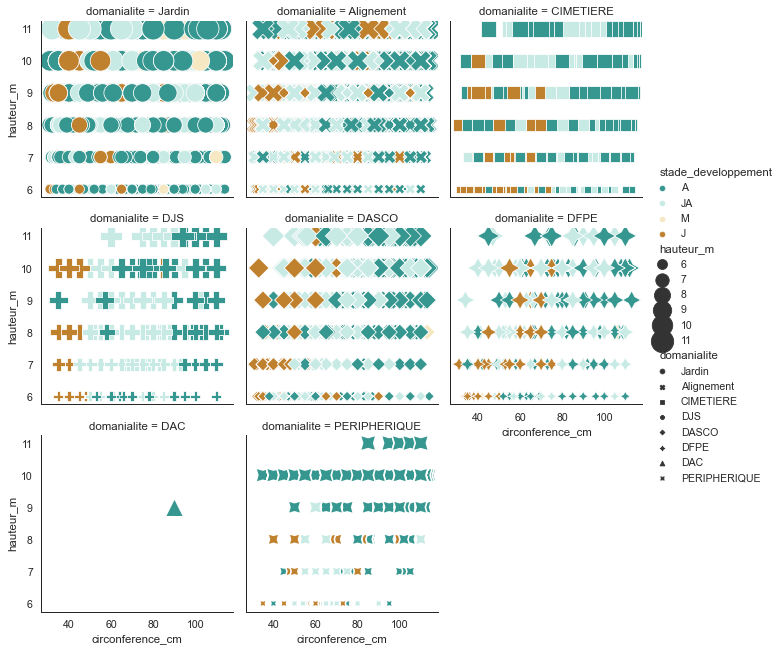

In [83]:
sns.relplot(data=data_good,
            x="circonference_cm",
            y="hauteur_m",
            hue="stade_developpement",
            style="domanialite",
            size="hauteur_m",
            sizes=(100, 500),
            
            col="domanialite",
            
            col_wrap=3,
            palette="BrBG_r",
  
            height=3)

plt.show()

On note que les arbres sont repartient de la même manière dans tout les dominalités sauf dans dans la dominalité DAC un seul type une seule taille  d'arbre

### 3.7. La visualisation de la relation entre domanialité, hauteur et stade de développement

In [84]:
result_h = pd.pivot_table(data=data_good,
                          index='stade_developpement',
                          columns='domanialite',
                          values='hauteur_m')


result_h

domanialite          Alignement  CIMETIERE  DAC     DASCO      DFPE       DJS  \
stade_developpement                                                             
A                      9.198246   8.530612  9.0  8.808403  8.205405  8.714623   
J                      7.564521   7.188442  NaN  7.208015  7.153153  7.643275   
JA                     8.787506   8.363973  NaN  8.449163  8.262500  8.281437   
M                      9.454545   8.000000  NaN  8.250000  6.333333       NaN   

domanialite            Jardin  PERIPHERIQUE  
stade_developpement                          
A                    8.404906      9.907108  
J                    7.138596      7.076923  
JA                   8.068266      8.415584  
M                    8.428571           NaN

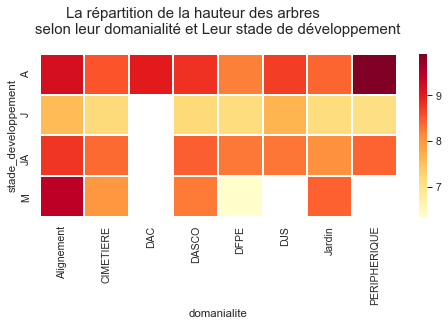

In [85]:
sns.heatmap(result_h, 
            cmap='YlOrRd', 
            linecolor='white',
            linewidth=1)


plt.title("La répartition de la hauteur des arbres\
            \nselon leur domanialité et Leur stade de développement",
          size=15, pad=20)

plt.show()

 Les plus vieux arbres se trouvent dans les lieux dit périphérique et alignement. La taille de l'arbre est proportionnelle à son âge, plus l'arbre vieux plus il est grand.

### 3.8. Les boites à moustache representant la répartition par domanialité,hauteur et stadede developpement

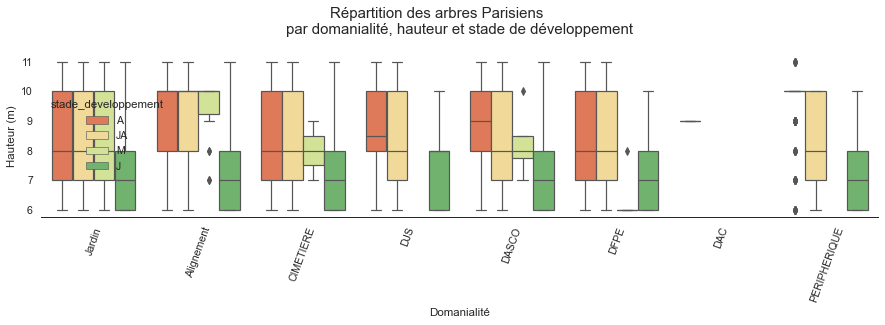

In [86]:
sns.set(rc={'figure.figsize':(15, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)

sns.boxplot(data=data_good,
            x='domanialite', 
            y='hauteur_m',
            hue="stade_developpement",
            palette='RdYlGn'
            )

plt.title('Répartition des arbres Parisiens\
           \npar domanialité, hauteur et stade de développement',
          size=15, pad=20)
plt.xlabel("Domanialité")
plt.ylabel("Hauteur (m)")

plt.xticks(rotation=70)


sns.despine(left=True)

plt.show()

les boites à moustache confirme que les arbres sont répartit de la mmeme maniere sur les toutes dominalité les dominalité sauf  


### 3.9. La répartition des arbres par domanialité, hauteur et stade de développement

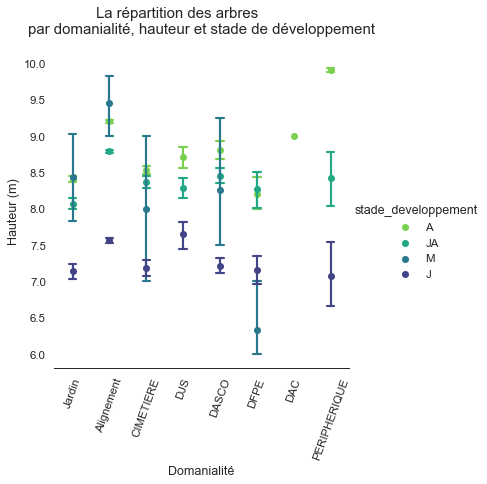

In [87]:
sns.set(rc={'figure.figsize':(15, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.3)

sns.catplot(data=data_good,
            x='domanialite', 
            y='hauteur_m',
            hue="stade_developpement",
            kind="point",
            join=False,
            capsize=0.2,
            palette='viridis_r'
            )
 
plt.title('La répartition des arbres\
            \npar domanialité, hauteur et stade de développement',
          size=15, pad=20)
plt.xlabel("Domanialité")
plt.ylabel("Hauteur (m)")

sns.despine(left=True)

plt.xticks(rotation=70)

plt.show()

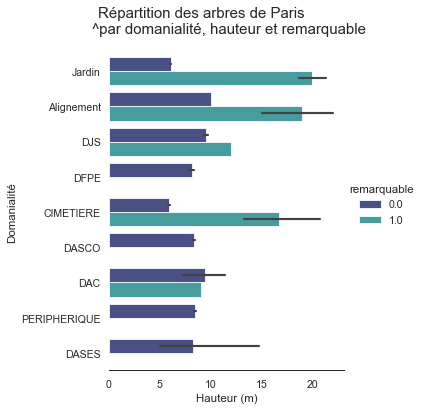

In [88]:
sns.set(rc={'figure.figsize':(6, 3)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)

sns.catplot(data=data_filtered,
            x='hauteur_m',
            y='domanialite',
            hue="remarquable",
            kind="bar",
            palette='mako'
            )

plt.title('Répartition des arbres de Paris\
            \n ^par domanialité, hauteur et remarquable',
          size=15, pad=20)
plt.xlabel("Hauteur (m)")
plt.ylabel("Domanialité")

sns.despine(left=True)

plt.show()

Les arbres remarquable sont les plus grands.

### 3.10. La répartition des arbres selon la circonférence

C:\Users\benab\anaconda3\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 3 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


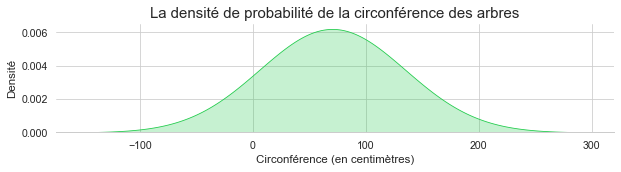

In [89]:
sns.set(rc={'figure.figsize':(10, 2)})
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.2)

sns.kdeplot(data_good.circonference_cm,
            
            shade=True,            
            cbar=True,
            
            bw=3,
           
            color="#1FCB4A"
           )

plt.title('La densité de probabilité de la circonférence des arbres',
          size=15)
plt.xlabel("Circonférence (en centimètres)")
plt.ylabel("Densité")

sns.despine(left=True)

plt.show()

La plus grande densité d'arbre la plus présente est ceux ce la circonférence d"environ 70 com

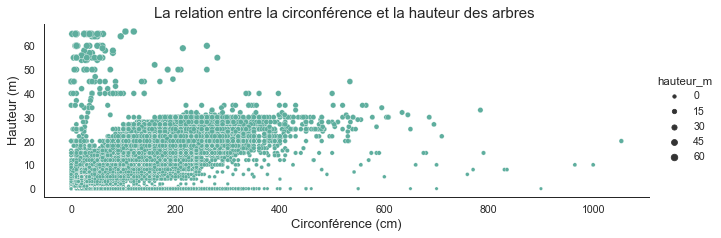

In [90]:
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)

sns.relplot(x="circonference_cm",
            y="hauteur_m",
            data=data_filtered,
            size="hauteur_m",
            color="#5EAE9E",
            
            aspect=3,
            
            height=3)

plt.title('La relation entre la circonférence et la hauteur des arbres ',
             size=15)
plt.xlabel('Circonférence (cm)',
             size=13)
plt.ylabel('Hauteur (m)',
             size=13)

plt.show()

Cette relation montre que la hauteur est plutot  proportionnelle à la circonférence.

### 3.10. La corrélation entre toutes les variable

<AxesSubplot:>

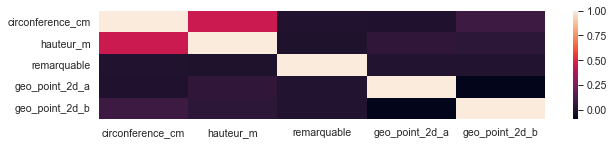

In [91]:
sns.heatmap(data_good.corr())

La plus grande est corrélation est celle entre la hauteur et la circonférence

### 3.11. La jointure entre la hauteur et la circonférence

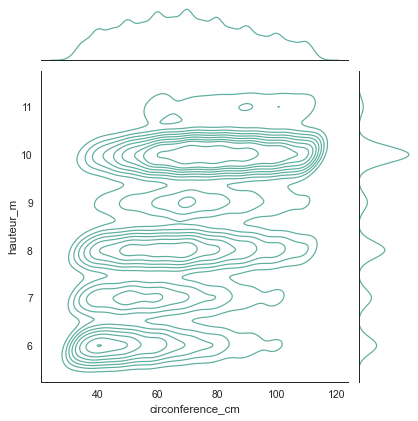

In [92]:
x = data_good['circonference_cm']
y = data_good['hauteur_m']

sns.set(rc={'figure.figsize':(10, 2)})
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)

sns.jointplot(x=x,
              y=y,
              kind='kde',
              color="#5EAE9E")

plt.show()

Ces courbse montrent que la hauteur est plutot proportionnelle à la circonférence. Les les plus nombreux sont les arbres de 10 et les arbre arbres de circonférence au-dessus de 80 com.